# Python for Machine Learning

### *Session \#3*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Regression and Parametric Models

### Warm Ups

*Type the given code into the cell below*

---

In [161]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from yellowbrick.model_selection import LearningCurve, ValidationCurve
from yellowbrick.regressor import ResidualsPlot

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('housing.csv', usecols=range(9))
df = df.dropna()

**Create training/test sets:** 
```
X = df.drop(columns=['median_price'])
y = df['median_price']
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

In [29]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Train model and show Residuals Plot:** 
```
model = ResidualsPlot(LinearRegression())
model.fit(X_train, y_train)
model.score(X_test, y_test)
```

**Find average error:** 
```python
y_predicted = model.predict(X_test)
mean_absolute_error(y_predicted, y_test)
```

### Exercises
---

**1. For each machine learning task, state whether it's better suited for a parametric or non-parametric model:**

* Predicting spread of a contagious disease 
* Recognizing handwritten digits
* Predicting the position of a planet
* Facial recognition

In [ ]:
# Parametric, because we know contagious diseases follow a curve (exponential, gaussian, etc)
# Non-parametric, since digits are irregular and do not fall under a general equation
# Parametric, since planets follow elliptical shaped paths. 
# Non-parametric, since facial similarity isn't captured by an equation


**2. Say we are trying to predict car price based on age.**

**For cars _older_ than any of the ones in the training set, how would a linear model predict price? KNN?**

**Which model will perform better on _slightly older_ cars? Which will perform better on _much older_ cars?**

![car_prices](../images/car_prices.png)

In [ ]:
# Linear model would continue downward with the same slope. 
# This will perform well for slightly older cars, but eventually will go negative and be very unrealistic.

# KNN model will average together the oldest cars in the training set, 
# to create a prediction for cars older than seen previously. 
# This will be less accurate for slightly older cars, but avoid going negative with very old cars.

**3. Train LinearRegression model and KNN model.** `linear` and `knn`

**What is the R2 and mean absolute error of each?**

In [33]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(mean_absolute_error(knn.predict(X_test), y_test))

linear = LinearRegression()
linear.fit(X_train, y_train)
print(linear.score(X_test, y_test))
print(mean_absolute_error(linear.predict(X_test), y_test))

0.2568016625888683
77251.42979056566
0.6402768968193262
50833.76819254157


**4. Use** `scale()` **on your feature matrix X before training** `linear` **and** `knn`

**How does this affect the R2 score and mean absolute error of both models?**

In [45]:
X = scale(df.drop(columns=['median_house_value']))
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(mean_absolute_error(knn.predict(X_test), y_test))

linear = LinearRegression()
linear.fit(X_train, y_train)
print(linear.score(X_test, y_test))
print(mean_absolute_error(linear.predict(X_test), y_test))

0.6941296941471693
43084.869641808575
0.6317048031732586
51507.70708821559


**5. Paste your solution to the last problem below**


**To study the effect of limited data, rerun** `train_test_split` **with** `test_size=0.95`

**Which model fares better when data is scarce?**

In [44]:
X = scale(df.drop(columns=['median_house_value']))
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(mean_absolute_error(knn.predict(X_test), y_test))

linear = LinearRegression()
linear.fit(X_train, y_train)
print(linear.score(X_test, y_test))
print(mean_absolute_error(linear.predict(X_test), y_test))

0.6039569774469418
51975.528291778275
0.6319923405688153
50675.00625147059


**6. Create a residual plot of** `linear` **and** `knn`

**Where model performs better on extreme values? Overall?**

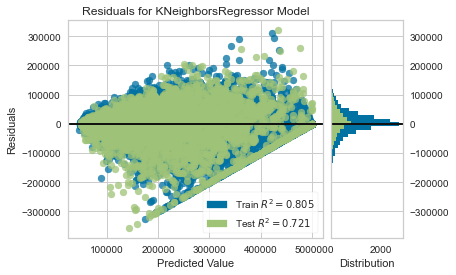

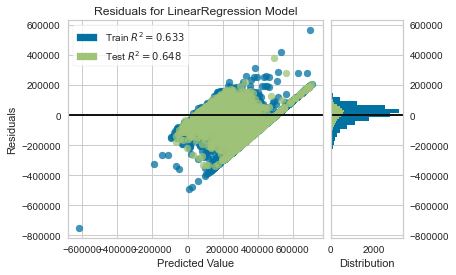

In [48]:
X = scale(df.drop(columns=['median_house_value']))
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = ResidualsPlot(KNeighborsRegressor())
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
knn.finalize()
knn.show()

linear = ResidualsPlot(LinearRegression())
linear.fit(X_train, y_train)
linear.score(X_test, y_test)
linear.finalize()
linear.show()

## II. Overfitting and Regularization

### Warm Ups

*Type the given code into the cell below*

---
**Create a ridge regression model:**
```python
model = Ridge(alpha=1)
```

**Train model and show Learning Curve:** 
```
model_learn = LearningCurve(model)
model_learn.fit(X_train, y_train)
model_learn.score(X_test, y_test)
model_learn.finalize()
```

**Feature importance:** `sorted(zip(model.coef_, X.columns))`

### Exercises
---

**1. For each of the following situations, state whether LASSO or Ridge regression would be more appropriate:**

* Predicting height based on thousands of genes
* Predicting rent prices based on a few house/neighborhood features
* Predicting a customer's monthly expenses using features like location, age, etc
* Predicting a patient's blood pressure based on dozens of facts about lifestyle, pre-existing conditions, etc

In [ ]:
# LASSO, since lots of features will be irrelevant
# Ridge, since there are few features and many may provide small amount of signal
# Ridge, since these features will all likely contribute a small amount of signal
# LASSO, since lots of features will be irrelevant

**2. Let's see how linear regression can overfit**

**Create your feature matrix and target vector using just the first 100 rows of** `df`

**Train a LinearRegression model from these data sets** 

In [199]:
df = df[:100]

X = df.drop(columns=['median_house_value'])
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)


model_learn = LinearRegression()
model_learn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**3. What is the model's R2 score on the test set? How about the training set?**

**What does this tell you about the model?**

In [201]:
model_learn.score(X_test, y_test)
model_learn.score(X_train, y_train)

0.7888105228236051

**4. Replace the LinearRegression model with a Ridge model**

**Use a ValidationCurve to choose a good value for alpha** 

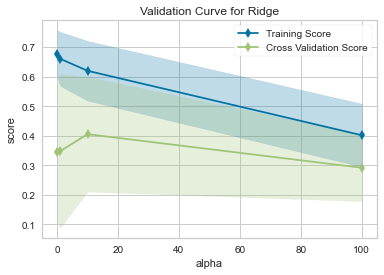

In [197]:
X = scale(df.drop(columns=['median_house_value']))
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model_val = ValidationCurve(
    Ridge(), param_name="alpha",
    param_range=[0.1, 1, 10, 100], cv=4, scoring="r2"
)

model_val.fit(X_train, y_train)
model_val.finalize()

## III. Bias, Variance and Polynomial Regression

### Warm Ups

*Type the given code into the cell below*

---

**Setup**

In [172]:
X = df[['median_income']]
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Add polynomial features to model:**
```python
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)
```

In [173]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

**Predict and plot using model** 
```python
plt.scatter(X_test, y, color='gray')
plt.scatter(X_test, model.predict(X_test))
```

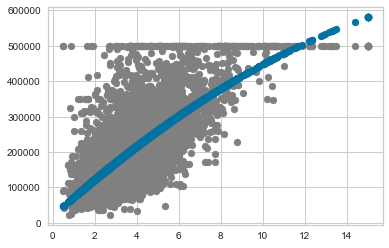

In [174]:
plt.scatter(X_test, y_test, color='gray')
plt.scatter(X_test, model.predict(X_test))

**Use a validation curve to test different polynomial degrees**
```python
model = ValidationCurve(model, 
                        param_name='polynomialfeatures__degree', 
                        param_range=range(1, 5))

model.fit(X, y)
```

### Exercises
---

**1. Let's say I have two columns** `x` **and** `y`. **If I add polynomial features up to degree 3, what will my columns look like? How many will I have?**

In [ ]:
# 6 columns -- x, y, x**2, y**2, x**3, y**3

**2. Create an instance of** `PolynomialFeatures(2)` **called** `poly`

**Call** `.fit_transform()` **on X_train to see the transformed data**

In [177]:
poly = PolynomialFeatures(2)

poly.fit_transform(X_train)

array([[ 1.        ,  5.997     , 35.964009  ],
       [ 1.        ,  3.1696    , 10.04636416],
       [ 1.        ,  1.9531    ,  3.81459961],
       ...,
       [ 1.        ,  2.9559    ,  8.73734481],
       [ 1.        ,  3.4773    , 12.09161529],
       [ 1.        ,  5.9907    , 35.88848649]])

**3. Create a pipeline with** `PolynomialFeatures(3)` **and a LinearRegression model**


In [182]:
pipe = make_pipeline(PolynomialFeatures(3), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

**4. Create a scatter plot of the model's predictions and the actual values** `median_home_value`

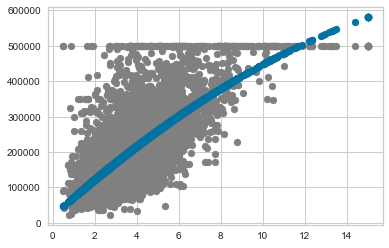

In [183]:
plt.scatter(X_test, y_test, color='gray')
plt.scatter(X_test, model.predict(X_test))

**5. Retrain the model using all the columns, instead of just** `median_income`

**What's the model's R2 score?**

In [186]:
X = df.drop('median_house_value', 1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = make_pipeline(PolynomialFeatures(3), LinearRegression())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7274569079323012

**6. Use a validation curve to test polynomial degrees up to 5.**

**At what degree does the model start to overfit?**

In [ ]:
val = ValidationCurve(pipe, 
                        param_name='polynomialfeatures__degree', 
                        param_range=range(1, 5))

val.fit(X_train, y_train)
val.finalize()